# Analizando datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [10]:
df = pd.read_csv('datos/csv/datos_produccion_clima_35.csv', sep=",")

In [11]:
df

,fecha,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento,acumulado_anual,acumulado_verano
0,31/12/1985,3514,1419,912,15600,0.00,0.00,4.44,64.27,14.3,6.4,20.9,0.0,208.6,0.0,6.1,208.1,56.1
1,31/12/1986,3783,1520,680,18167,0.00,0.00,4.80,44.74,12.9,5.8,20.5,58.1,130.3,0.0,6.8,130.0,20.7
2,31/12/1987,3988,1928,512,11200,0.00,0.00,2.81,26.56,13.8,6.8,20.7,60.3,199.5,0.0,6.4,199.3,77.1
3,31/12/1988,3590,1560,310,13197,0.00,0.00,3.68,19.87,12.9,5.5,20.4,54.9,85.5,0.0,6.3,85.4,29.0
4,31/12/1989,2830,1210,150,12300,0.00,0.00,4.35,12.40,14.5,7.1,21.9,56.5,92.5,0.0,6.3,92.0,12.8
5,31/12/1990,2396,998,124,13900,0.00,0.00,5.80,12.42,14.2,6.8,21.7,56.2,96.0,0.0,7.4,95.8,0.8
6,31/12/1991,2503,1122,60,15800,0.00,0.00,6.31,5.35,13.2,5.8,20.6,60.3,240.0,0.0,6.3,239.7,41.5
7,31/12/1992,2790,1125,70,11600,0.00,0.00,4.16,6.22,14.4,4.7,19.9,62.2,335.2,0.0,6.4,334.8,109.7
8,31/12/1993,2765,1240,65,10306,0.00,0.00,3.73,5.24,14.8,5.5,21.0,58.1,155.7,0.0,5.9,155.2,72.2
9,31/12/1994,2641,925,34,9000,0.00,0.00,3.41,3.68,13.5,4.6,24.3,53.7,82.5,0.0,15.5,82.3,22.1


In [52]:
df['rinde_seco'] = pd.to_numeric(df['rinde_seco'], errors='coerce')
df['finura'] = pd.to_numeric(df['finura'], errors='coerce')
df['kilo_lana_p/animal'] = pd.to_numeric(df['kilo_lana_p/animal'], errors='coerce')
df['porcentaje_paricion'] = pd.to_numeric(df['porcentaje_paricion'], errors='coerce')
df['temp_media'] = pd.to_numeric(df['temp_media'], errors='coerce')
df['temp_min'] = pd.to_numeric(df['temp_min'], errors='coerce')
df['tem_max'] = pd.to_numeric(df['tem_max'], errors='coerce')
df['humedad'] = pd.to_numeric(df['humedad'], errors='coerce')
df['cant_lluvia'] = pd.to_numeric(df['cant_lluvia'], errors='coerce')
df['rad_solar'] = pd.to_numeric(df['rad_solar'], errors='coerce')
df['vel_viento'] = pd.to_numeric(df['vel_viento'], errors='coerce')

In [4]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (38, 18)
Nombre columnas: Index(['fecha', 'esquila', 'ovejas', 'corderos', 'kilos_lana', 'rinde_seco',
       'finura', 'kilo_lana_p/animal', 'porcentaje_paricion', 'temp_media',
       'temp_min', 'tem_max', 'humedad', 'cant_lluvia', 'rad_solar',
       'vel_viento', 'acumulado_anual', 'acumulado_verano'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha                36 non-null     object 
 1   esquila              36 non-null     int64  
 2   ovejas               36 non-null     int64  
 3   corderos             36 non-null     int64  
 4   kilos_lana           36 non-null     int64  
 5   rinde_seco           36 non-null     float64
 6   finura               36 non-null     float64
 7   kilo_lana_p/animal   36 non-null     float64
 8   porcentaje_paricion  36 non-null     float64
 9   temp_media           36 non-null     float64
 10  temp_min             36 non-null     float64
 11  tem_max              36 non-null     float64
 12  humedad              36 non-null     float64
 13  cant_lluvia          36 non-null     float64
 14  rad_solar            36 non-null     float64
 15  vel_viento           36 non-null     float

In [13]:
df.describe()

,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento,acumulado_anual,acumulado_verano
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2910.166667,1497.805556,522.527778,11813.388889,30.692222,10.400833,4.143889,34.732778,13.452778,5.805556,21.150000,51.222222,181.741667,2184.044444,7.372222,181.341667,49.513889
std,709.540395,561.386387,359.433641,2933.659258,29.533112,9.990382,0.867885,20.408218,0.680960,0.948365,1.009809,12.709729,71.551250,2223.645303,2.493146,71.526844,31.108420
min,1651.000000,768.000000,34.000000,5245.000000,0.000000,0.000000,2.810000,3.680000,11.900000,2.600000,19.300000,0.000000,59.800000,0.000000,4.100000,59.600000,0.800000
25%,2352.250000,1116.750000,275.000000,9921.250000,0.000000,0.000000,3.597500,18.007500,12.975000,5.500000,20.600000,50.575000,130.600000,0.000000,6.050000,130.075000,24.500000
50%,2896.500000,1309.000000,503.500000,11410.500000,53.500000,18.500000,3.970000,37.365000,13.500000,6.000000,20.950000,55.000000,181.900000,2046.800000,6.600000,181.600000,42.850000
75%,3503.500000,1852.500000,714.000000,13566.500000,57.925000,19.600000,4.540000,48.230000,13.825000,6.400000,21.625000,56.750000,213.875000,4253.225000,7.975000,213.275000,77.225000
max,4239.000000,3083.000000,1455.000000,18167.000000,65.270000,21.000000,6.310000,71.600000,14.800000,7.100000,24.300000,62.200000,355.000000,5019.000000,15.500000,354.600000,109.700000


Hay que tener en cuenta los siguientes puntos con respecto a las matrices de correlación:

1. Cada celda de la cuadrícula representa el valor del coeficiente de correlación entre dos variables.
2. El valor en la posición (a, b) representa el coeficiente de correlación entre los elementos de la fila a y la columna b. Será igual al valor en la posición (b, a)
3. Es una matriz cuadrada – cada fila representa una variable, y todas las columnas representan las mismas variables que las filas, de ahí el número de filas = número de columnas.
4. Es una matriz simétrica – esto tiene sentido porque la correlación entre a,b será la misma que la de b,a.
5. Todos los elementos diagonales son 1. Dado que los elementos diagonales representan la correlación de cada variable consigo misma, siempre será igual a 1.
6. Los marcadores de los ejes denotan el rasgo que cada uno de ellos representa.
7. Un valor positivo grande (cercano a 1,0) indica una fuerte correlación positiva, es decir, si el valor de una de las variables aumenta, el valor de la otra variable aumenta también.
8. Un valor negativo grande (cercano a -1,0) indica una fuerte correlación negativa, es decir, que el valor de una de las variables disminuye al aumentar el de la otra y viceversa.
9. Un valor cercano a 0 (tanto positivo como negativo) indica la ausencia de cualquier correlación entre las dos variables, y por lo tanto esas variables son independientes entre sí.
10. Cada celda de la matriz también está representada por sombras de un color. En este caso, los tonos más oscuros del color indican valores más pequeños, mientras que los tonos más brillantes corresponden a valores más grandes (cerca de 1). Esta escala se da con la ayuda de una barra de color en el lado derecho del gráfico.

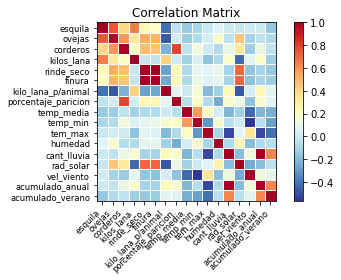

In [14]:
corr = df.set_index('fecha').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

<AxesSubplot:>

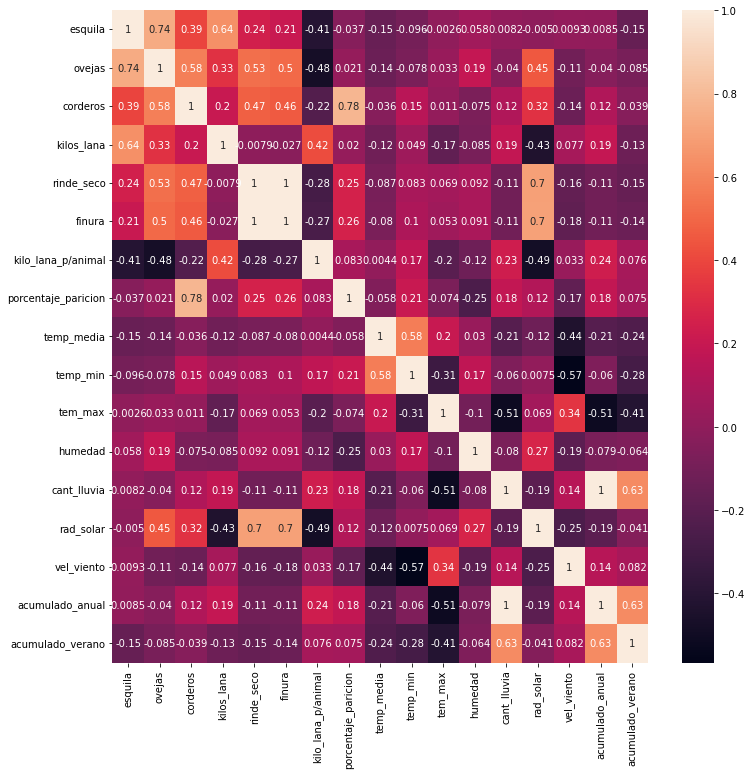

In [15]:
correlation_mat = df.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

In [16]:
corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento,acumulado_anual,acumulado_verano
esquila,1.000000,0.740884,0.391505,0.641326,0.243610,0.209908,-0.407642,-0.037202,-0.145936,-0.095927,-0.002552,0.058091,0.008152,-0.005042,0.009299,0.008464,-0.153361
ovejas,0.740884,1.000000,0.582920,0.325377,0.528266,0.504378,-0.477438,0.020741,-0.137657,-0.078467,0.033125,0.190747,-0.039575,0.450021,-0.109077,-0.039870,-0.085284
corderos,0.391505,0.582920,1.000000,0.200136,0.473912,0.458518,-0.223997,0.782419,-0.035767,0.145390,0.010836,-0.074989,0.117875,0.322784,-0.135520,0.117544,-0.038844
kilos_lana,0.641326,0.325377,0.200136,1.000000,-0.007938,-0.027184,0.416885,0.019703,-0.115961,0.049104,-0.171192,-0.085336,0.185744,-0.434207,0.077018,0.186331,-0.131636
rinde_seco,0.243610,0.528266,0.473912,-0.007938,1.000000,0.997536,-0.284601,0.254502,-0.087072,0.083446,0.069196,0.091804,-0.108371,0.696648,-0.162964,-0.108897,-0.150989
finura,0.209908,0.504378,0.458518,-0.027184,0.997536,1.000000,-0.265111,0.256903,-0.079765,0.103398,0.053019,0.090692,-0.108769,0.702193,-0.178112,-0.109268,-0.137066
kilo_lana_p/animal,-0.407642,-0.477438,-0.223997,0.416885,-0.284601,-0.265111,1.000000,0.082682,0.004429,0.173192,-0.204180,-0.120281,0.234535,-0.485526,0.032825,0.235078,0.076213
porcentaje_paricion,-0.037202,0.020741,0.782419,0.019703,0.254502,0.256903,0.082682,1.000000,-0.058117,0.207714,-0.073802,-0.249633,0.184808,0.120514,-0.170033,0.184613,0.074951
temp_media,-0.145936,-0.137657,-0.035767,-0.115961,-0.087072,-0.079765,0.004429,-0.058117,1.000000,0.575121,0.200063,0.030166,-0.214100,-0.123780,-0.436502,-0.214513,-0.240559
temp_min,-0.095927,-0.078467,0.145390,0.049104,0.083446,0.103398,0.173192,0.207714,0.575121,1.000000,-0.312366,0.168951,-0.060467,0.007479,-0.566428,-0.060475,-0.278907


### Cargamos dataset con datos sin ceros

In [17]:
df = pd.read_csv('datos/csv/datos_produccion_clima_35_1.csv', sep=",")
df

,fecha,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento,acumulado_anual,acumulado_verano
0,31/12/1985,3514,1419,912,15600,60.46,19.26,4.44,64.27,14.3,6.4,20.9,57.6,208.6,4312.72,6.1,208.1,56.1
1,31/12/1986,3783,1520,680,18167,61.52,19.86,4.80,44.74,12.9,5.8,20.5,58.1,130.3,4236.36,6.8,130.0,20.7
2,31/12/1987,3988,1928,512,11200,55.77,19.41,2.81,26.56,13.8,6.8,20.7,60.3,199.5,4142.41,6.4,199.3,77.1
3,31/12/1988,3590,1560,310,13197,61.69,18.65,3.68,19.87,12.9,5.5,20.4,54.9,85.5,4225.09,6.3,85.4,29.0
4,31/12/1989,2830,1210,150,12300,57.13,19.82,4.35,12.40,14.5,7.1,21.9,56.5,92.5,4195.38,6.3,92.0,12.8
5,31/12/1990,2396,998,124,13900,59.84,20.23,5.80,12.42,14.2,6.8,21.7,56.2,96.0,4234.69,7.4,95.8,0.8
6,31/12/1991,2503,1122,60,15800,60.56,20.47,6.31,5.35,13.2,5.8,20.6,60.3,240.0,4283.24,6.3,239.7,41.5
7,31/12/1992,2790,1125,70,11600,54.04,19.80,4.16,6.22,14.4,4.7,19.9,62.2,335.2,4278.28,6.4,334.8,109.7
8,31/12/1993,2765,1240,65,10306,58.81,19.30,3.73,5.24,14.8,5.5,21.0,58.1,155.7,4290.75,5.9,155.2,72.2
9,31/12/1994,2641,925,34,9000,61.83,18.87,3.41,3.68,13.5,4.6,24.3,53.7,82.5,4140.00,15.5,82.3,22.1


<AxesSubplot:>

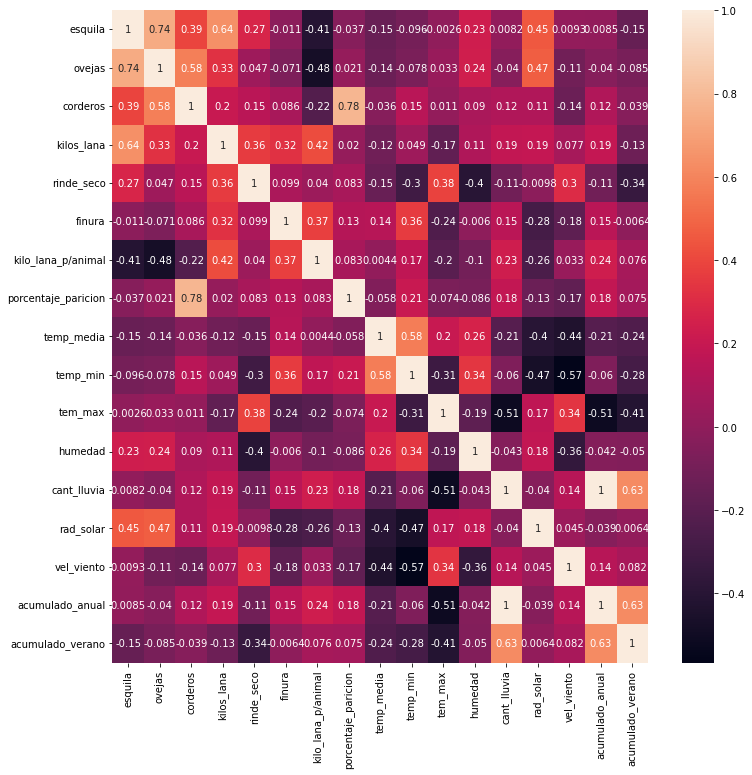

In [18]:
correlation_mat = df.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

In [19]:
corr_df = df.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento,acumulado_anual,acumulado_verano
esquila,1.000000,0.740884,0.391505,0.641326,0.272597,-0.010779,-0.407642,-0.037202,-0.145936,-0.095927,-0.002552,0.231852,0.008152,0.453789,0.009299,0.008464,-0.153361
ovejas,0.740884,1.000000,0.582920,0.325377,0.047405,-0.070540,-0.477438,0.020741,-0.137657,-0.078467,0.033125,0.237755,-0.039575,0.473662,-0.109077,-0.039870,-0.085284
corderos,0.391505,0.582920,1.000000,0.200136,0.152937,0.086413,-0.223997,0.782419,-0.035767,0.145390,0.010836,0.089989,0.117875,0.112836,-0.135520,0.117544,-0.038844
kilos_lana,0.641326,0.325377,0.200136,1.000000,0.363225,0.322557,0.416885,0.019703,-0.115961,0.049104,-0.171192,0.112693,0.185744,0.188597,0.077018,0.186331,-0.131636
rinde_seco,0.272597,0.047405,0.152937,0.363225,1.000000,0.099300,0.040183,0.082572,-0.145631,-0.299138,0.384087,-0.398609,-0.111334,-0.009765,0.300843,-0.111499,-0.337738
finura,-0.010779,-0.070540,0.086413,0.322557,0.099300,1.000000,0.371158,0.133073,0.139896,0.359578,-0.240121,-0.005963,0.153478,-0.283455,-0.181888,0.153293,-0.006434
kilo_lana_p/animal,-0.407642,-0.477438,-0.223997,0.416885,0.040183,0.371158,1.000000,0.082682,0.004429,0.173192,-0.204180,-0.104849,0.234535,-0.256234,0.032825,0.235078,0.076213
porcentaje_paricion,-0.037202,0.020741,0.782419,0.019703,0.082572,0.133073,0.082682,1.000000,-0.058117,0.207714,-0.073802,-0.085732,0.184808,-0.132964,-0.170033,0.184613,0.074951
temp_media,-0.145936,-0.137657,-0.035767,-0.115961,-0.145631,0.139896,0.004429,-0.058117,1.000000,0.575121,0.200063,0.263512,-0.214100,-0.396040,-0.436502,-0.214513,-0.240559
temp_min,-0.095927,-0.078467,0.145390,0.049104,-0.299138,0.359578,0.173192,0.207714,0.575121,1.000000,-0.312366,0.344588,-0.060467,-0.473087,-0.566428,-0.060475,-0.278907
